In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data_RENO = pd.read_table('reno_data_cal.dat', names=['s22t13','dmee','ji'],delim_whitespace=True)
ji_min=data_RENO['ji'].min()
data_RENO['ji']=data_RENO['ji']-ji_min
min_data=pd.read_table('min_param_reno_data_cal.dat', names=['ji','s2','dm'],delim_whitespace=True)

In [3]:
data_68=data_RENO[(data_RENO['ji'] <= 2.3) & (data_RENO['ji'] >= 2.25)]
data_95=data_RENO[(data_RENO['ji'] <= 6.18) & (data_RENO['ji'] >= 6.10)]
data_99=data_RENO[((data_RENO['ji'] <= 11.83) & (data_RENO['ji'] >= 11.71))]
data_68=data_68[['s22t13','dmee']]
data_95=data_95[['s22t13','dmee']]
data_99=data_99[['s22t13','dmee']]

data_68.to_csv('reno_confidence_region_68.dat', sep=' ', index=False, header=False)
data_95.to_csv('reno_confidence_region_95.dat', sep=' ', index=False, header=False)
data_99.to_csv('reno_confidence_region_99.dat', sep=' ', index=False, header=False)


In [4]:
data_cl68 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl68.csv', delim_whitespace=True)
data_cl95 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl95.csv', delim_whitespace=True)
data_cl99 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl99.csv', delim_whitespace=True)
x_68=data_68['s22t13'].to_numpy()
y_68=data_68['dmee'].to_numpy()

x_95=data_95['s22t13'].to_numpy()
y_95=data_95['dmee'].to_numpy()

x_99=data_99['s22t13'].to_numpy()
y_99=data_99['dmee'].to_numpy()


x_cl68=data_cl68['s22t13'].to_numpy()
y_cl68=data_cl68['dmee'].to_numpy()

x_cl95=data_cl95['s22t13'].to_numpy()
y_cl95=data_cl95['dmee'].to_numpy()

x_cl99=data_cl99['s22t13'].to_numpy()
y_cl99=data_cl99['dmee'].to_numpy()

In [5]:
len(x_68), len(y_68),len(x_95), len(y_95),len(x_99), len(y_99)

(2147, 2147, 3568, 3568, 5608, 5608)

In [6]:
len(x_cl68), len(y_cl68),len(x_cl95), len(y_cl95),len(x_cl99), len(y_cl99)

(1612, 1612, 1100, 1100, 588, 588)

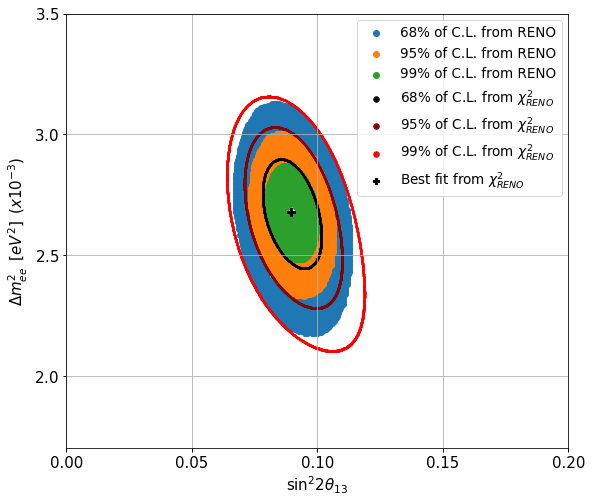

In [7]:
fig, ax = plt.subplots(figsize=(9,8))
ax.scatter(x_cl68, y_cl68,label='68% of C.L. from RENO') # RENO DATA
ax.scatter(x_cl95, y_cl95,label='95% of C.L. from RENO') # RENO DATA
ax.scatter(x_cl99, y_cl99,label='99% of C.L. from RENO') # RENO DATA
ax.scatter(x_68, y_68,s=0.5,c='black',label=r'68% of C.L. from $\chi^2_{RENO}$')     # MY RENO DATA
ax.scatter(x_95, y_95,s=0.5,c='darkred',  label='95% of C.L. from $\chi^2_{RENO}$') # MY RENO DATA
ax.scatter(x_99, y_99,s=0.5,c='red', label='99% of C.L. from $\chi^2_{RENO}$')      # MY RENO DATA
ax.scatter(min_data.to_numpy()[0][1], min_data.to_numpy()[0][2],marker="P",c='black',s=80,label='Best fit from $\chi^2_{RENO}$')      # MY RENO DATA




#ax.text(0.5, 0.5, 'Preliminary', transform=ax.transAxes,fontsize=40, color='red', alpha=0.5,ha='center', va='center', rotation='30')
ax.set_xlim(0.00, 0.2)
ax.set_ylim(0.0017, 0.0035)

ax.set_xticks([0,0.05,0.1,0.15,0.2])
ax.set_yticks([0.002,0.0025,0.0030,0.0035])

ax.set_yticklabels(['$2.0$','$2.5$','$3.0$','$3.5$'])

lgnd=ax.legend()

# Plot legend.
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=13.5)
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [40]

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(labelcolor='black', labelsize=15, width=1)

ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$')
ax.grid(True, linestyle='-')

#fig.savefig("reno.eps")
fig.savefig("reno.png")
plt.show()


In [8]:
#Datos del análisis
parabol_s2 = pd.read_table('parabol_s2_reno.dat', names=['s22t13','ji'],delim_whitespace=True)
ji_min=parabol_s2['ji'].min()
parabol_s2['ji']=parabol_s2['ji']-ji_min
parabol_dmee = pd.read_table('parabol_dmee_reno.dat', names=['dmee','ji'],delim_whitespace=True)
ji_min=parabol_dmee['ji'].min()
parabol_dmee['ji']=parabol_dmee['ji']-ji_min

In [9]:
dmee_dat=data_RENO['ji'].min()
s2=0.0
dmee=0.0
#data_RENO
x_s2=[]
y_s2=[]
x_dmee=[]
y_dmee=[]
for i in data_RENO.index:    
    if (0.0 == data_RENO['ji'][i]): 
        s2  =data_RENO['s22t13'][i]
        dmee=data_RENO['dmee'][i]

for i in data_RENO.index:    
    if (s2 == data_RENO['s22t13'][i]): 
        x_dmee.append(data_RENO['dmee'][i])
        y_dmee.append(data_RENO['ji'][i])
    if (dmee == data_RENO['dmee'][i]): 
        x_s2.append(data_RENO['s22t13'][i])
        y_s2.append(data_RENO['ji'][i])
        
x_s2=np.array(x_s2)
y_s2=np.array(y_s2)
x_dmee=np.array(x_dmee)
y_dmee=np.array(y_dmee)

In [10]:
s2_ = pd.DataFrame(x_s2)
dmee_ = pd.DataFrame(x_dmee)

ji_s2_ = pd.DataFrame(y_s2)
ji_dmee_ = pd.DataFrame(y_dmee)

s2_parabola   = pd.concat([ji_s2_,s2_],axis=1)
dmee_parabola = pd.concat([ji_dmee_,dmee_],axis=1)

s2_parabola.to_csv('reno_s2.csv')
dmee_parabola.to_csv('reno_dmee.csv')

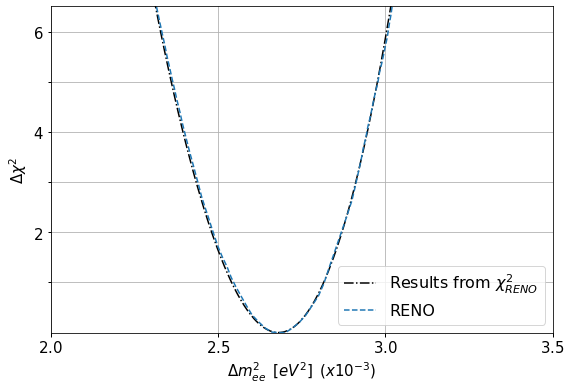

In [11]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_dmee,y_dmee,c='black',linestyle='-.',label=r'Results from $\chi^2_{RENO}$')
ax.plot(parabol_dmee['dmee'].to_numpy(),parabol_dmee['ji'].to_numpy(),linestyle='--',label=r'RENO')
#ax.scatter(parabol_dmee['dmee'].to_numpy(),parabol_dmee['ji'].to_numpy(),marker=".",label=r'RENO results')

ax.legend()
ax.set_xlim(0.002, 0.0035)
ax.set_ylim(0.0, 6.5)
ax.grid(True, linestyle='-')

ax.set_xticks([0.002,0.0025,0.003,0.0035,])
ax.set_yticks([1,2,3,4,5,6])
ax.set_xticklabels(['$2.0$','$2.5$','$3.0$','$3.5$'])
ax.set_yticklabels(['','$2$','','$4$','','$6$',''])

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=16)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(labelcolor='black', labelsize=15, width=1)


ax.set(xlabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$', ylabel=r'$\Delta \chi^2 $')
fig.savefig("reno_parabol_dmee.png")
#fig.savefig("reno_parabol_dmee.eps")

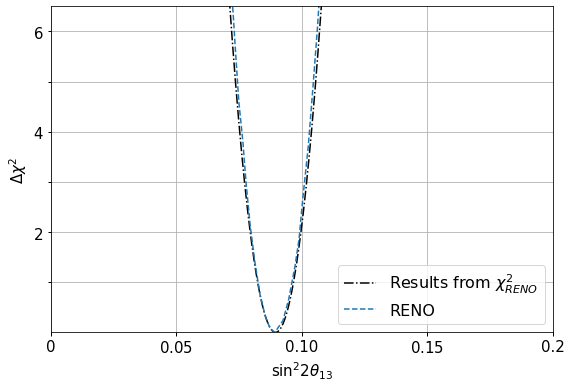

In [12]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_s2,y_s2,c='black',linestyle='-.',label=r'Results from $\chi^2_{RENO}$')
ax.plot(parabol_s2['s22t13'].to_numpy(),parabol_s2['ji'].to_numpy(),linestyle='--',label=r'RENO')

ax.legend()
ax.set_xlim(0.00, 0.2)
ax.set_ylim(0.0, 6.5)
ax.grid(True, linestyle='-')

ax.set_xticks([0,0.05,0.1,0.15,0.2])
ax.set_yticks([1,2,3,4,5,6])
ax.set_xticklabels(['0','$0.05$','0.10','$0.15$','0.2'])
ax.set_yticklabels(['','$2$','','$4$','','$6$',''])

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=16)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(labelcolor='black', labelsize=15, width=1)

ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta \chi^2$')
fig.savefig("reno_parabol_s22t13.png")
#fig.savefig("reno_parabol_s22t13.eps")

In [13]:
3

3

In [14]:
s2_left=0.08248170764726462
s2_right=0.09680451505329137
s2_min=min_data.to_numpy()[0][1]

s2_sigma_left  = s2_min   - s2_left
s2_sigma_right = s2_right - s2_min
print(s2_min)

(s2_sigma_left,s2_sigma_right)

0.0896086157288788


(0.007126908081614175, 0.007195899324412572)

In [15]:
# s2_sigma(0.0071,0.0072)
# dm_sigma(0.00014,0.00014)